In [1]:
import numpy as np
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.optim import optimizer

import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = 50
pd.options.display.min_rows = 20

%matplotlib notebook

In [2]:
crop_yield_data = pd.read_csv('/home/user/Documents/Dataset/CropYield/yield_forecasting_database_0718.csv',
                             parse_dates=['Date', ], dayfirst=True)

In [3]:
crop_yield_data

,Unnamed: 0,Vineyard_name,Block_name,Season,Date,Variety,NDVImean,NDVIsum,NDWImean,NDWIsum,NDVIRemean,NDVIResum,TCARImean,TCARIsum,SIPImean,SIPIsum,RRENDVImean,RRENDVIsum,RN2NDVImean,RN2NDVIsum,GNDVImean,GNDVIsum,MSRmean,MSRsum,RVImean,RVIsum,N2NDVImean,N2NDVIsum,RENDVI1mean,RENDVI1sum,RENDVI2mean,RENDVI2sum,RDVI1mean,RDVI1sum,RDVI2mean,RDVI2sum,TDVImean,TDVIsum,TDVI2mean,TDVI2sum,NLImean,NLIsum,LAIGmean,LAIGsum,SMmean,SMsum,GDD,Rainfall,Yield,Size,Ha,SizeClass,TimeTo,BlockAverage,VineyardVarietyAverage,HeatShock,FrostShock,MaxSize,PC1,PC2,Cabernet Sauvignon,Chardonnay,Marzemino,Merlot,Pinot Gris,Pinot Noir,Rare Red,Rare White,Riesling,Sauvignon Blanc,Sauvignon Gris,Syrah,YieldPerHec,YieldScale,High yield,Low yield,variety_idx,New_Longitude,New_Latitude
0,0,M33,M33SGRA,2017,2017-03-02,Sauvignon Gris,0.740918,700.908104,0.179463,169.771876,0.392568,371.368954,0.134938,127.650903,0.773903,732.112067,0.636275,601.916582,0.411498,389.276928,0.703271,665.294836,2.099081,1985.730419,6.987541,6610.213904,0.755095,714.319960,0.495762,468.991177,0.519476,491.424471,0.417432,394.890273,0.755095,714.319960,0.449033,424.785153,0.479682,453.779054,0.304651,288.199580,2.693769,2548.305267,0.453149,428.679313,802.0,636.0,43.366,946,938,Large,60,71.1690,78.268693,-1,-1,946,538.980888,12.244786,0,0,0,0,0,0,0,0,0,0,1,0,0.046232,Low yield,0,1,1,6.915636,45.922095
1,1,M33,M00BGFA,2017,2017-03-02,Pinot Gris,0.786083,517.242711,0.227985,150.013921,0.419335,275.922326,0.115664,76.107160,0.808175,531.779090,0.682158,448.859642,0.426194,280.435943,0.742054,488.271269,2.440964,1606.154376,8.625850,5675.809354,0.797466,524.732863,0.550287,362.088926,0.571382,375.969473,0.426074,280.356626,0.797466,524.732863,0.447189,294.250330,0.475947,313.172921,0.377381,248.316547,2.974321,1957.103000,0.632657,416.288583,802.0,636.0,42.980,658,652,Large,60,39.4806,93.506950,-1,-1,658,250.343140,14.076773,0,0,0,0,1,0,0,0,0,0,0,0,0.065920,Low yield,0,1,2,6.915636,45.922095
2,2,M33,C77IGMB,2017,2017-03-02,Pinot Gris,0.717883,1178.046488,0.158046,259.354077,0.363956,597.251994,0.121078,198.688195,0.759261,1245.947982,0.619473,1016.555458,0.403750,662.553521,0.698036,1145.476805,1.946544,3194.278044,6.311958,10357.923600,0.732991,1202.838505,0.483077,792.729407,0.507368,832.590514,0.389719,639.529677,0.732991,1202.838505,0.407882,669.334501,0.437265,717.552373,0.219227,359.752223,2.628323,4313.077726,0.511516,839.397052,802.0,636.0,212.083,1641,1629,XLarge,60,205.1076,93.506950,-1,-1,1641,1293.231233,29.758541,0,0,0,0,1,0,0,0,0,0,0,0,0.130192,Low yield,0,1,2,6.915636,45.922095
3,3,M33,J44POPD,2017,2017-03-02,Pinot Noir,0.732823,416.976093,0.182909,104.075383,0.377717,214.921125,0.110960,63.136513,0.755454,429.853453,0.634073,360.787657,0.407067,231.621229,0.693608,394.662719,2.104537,1197.481818,7.117464,4049.837023,0.747063,425.079037,0.501624,285.424225,0.525769,299.162791,0.386557,219.951134,0.747063,425.079037,0.397065,225.929852,0.425234,241.957877,0.235094,133.768424,2.727784,1552.108886,0.647480,368.416269,802.0,636.0,22.520,569,568,Large,60,27.3124,24.258222,-1,-1,569,103.733773,8.197270,0,0,0,0,0,1,0,0,0,0,0,0,0.039648,Low yield,0,1,3,6.915636,45.922095
4,4,M33,Q11WVWL,2017,2017-03-02,Pinot Noir,0.782788,439.926718,0.234459,131.765965,0.421701,236.995732,0.132387,74.401442,0.804453,452.102493,0.677133,380.548669,0.427313,240.150129,0.728956,409.673091,2.413730,1356.516332,8.485446,4768.820929,0.792497,445.383408,0.542648,304.968251,0.560589,315.051124,0.447649,251.578519,0.792497,445.383408,0.487539,273.996979,0.513172,288.402751,0.413861,232.589632,2.915985,1638.783326,0.510686,287.005621,802.0,636.0,22.260,562,557,Large,60,24.1448,24.258222,-1,-1,562,131.609356,7.079762,0,0,0,0,0,1,0,0,0,0,0,0,0.039964,Low yield,0,1,3,6.915636,45.922095
5,5,M33,X88EDEU,2017,2017-03-02,Pinot Noir,0.822291,790.221870,0.244260,234.733404,0.490406,471.280430,0.127612,122.635022,0.834475,801.930427,0.705930,678.398868,0.437736,420.664484,0.750745,721.465705,2.870665,2758.709390,11.2

<IPython.core.display.Javascript object>


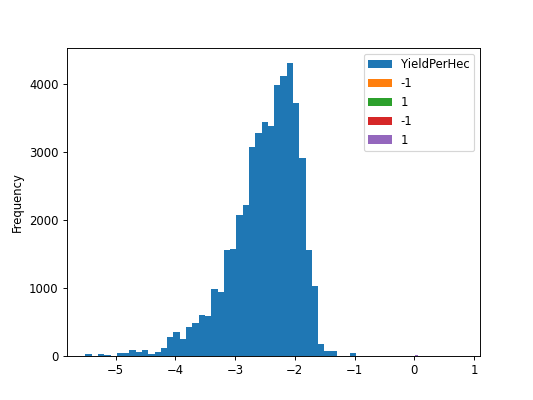

<AxesSubplot: ylabel='Frequency'>

In [4]:
np.log(crop_yield_data.YieldPerHec).plot.hist(bins=50, log=False)

In [9]:
crop_yield_data.groupby(crop_yield_data.FrostShock).YieldPerHec.plot.hist(density=True, bins=10)
plt.legend()

In [10]:
crop_yield_data[crop_yield_data.Block_name == 'M33SGRA'].sort_values('Date')

,Unnamed: 0,Vineyard_name,Block_name,Season,Date,Variety,NDVImean,NDVIsum,NDWImean,NDWIsum,NDVIRemean,NDVIResum,TCARImean,TCARIsum,SIPImean,SIPIsum,RRENDVImean,RRENDVIsum,RN2NDVImean,RN2NDVIsum,GNDVImean,GNDVIsum,MSRmean,MSRsum,RVImean,RVIsum,N2NDVImean,N2NDVIsum,RENDVI1mean,RENDVI1sum,RENDVI2mean,RENDVI2sum,RDVI1mean,RDVI1sum,RDVI2mean,RDVI2sum,TDVImean,TDVIsum,TDVI2mean,TDVI2sum,NLImean,NLIsum,LAIGmean,LAIGsum,SMmean,SMsum,GDD,Rainfall,Yield,Size,Ha,SizeClass,TimeTo,BlockAverage,VineyardVarietyAverage,HeatShock,FrostShock,MaxSize,PC1,PC2,Cabernet Sauvignon,Chardonnay,Marzemino,Merlot,Pinot Gris,Pinot Noir,Rare Red,Rare White,Riesling,Sauvignon Blanc,Sauvignon Gris,Syrah,YieldPerHec,YieldScale,High yield,Low yield,variety_idx,New_Longitude,New_Latitude
52,52,M33,M33SGRA,2017,2016-12-15,Sauvignon Gris,0.695693,658.125485,0.190022,179.760968,0.342844,324.330532,0.154927,146.561099,0.732190,692.651797,0.601059,568.601610,0.406552,384.598209,0.644774,609.956083,1.800017,1702.816159,5.671337,5365.084836,0.699946,662.149272,0.465408,440.275924,0.471803,446.325440,0.422892,400.055451,0.699946,662.149272,0.476716,450.973252,0.485068,458.874634,0.273183,258.431136,2.436094,2304.545003,0.353862,334.753747,342.0,435.6,43.366,946,938,Large,137,71.169,78.268693,-1,-1,946,475.714032,-12.803522,0,0,0,0,0,0,0,0,0,0,1,0,0.046232,Low yield,0,1,1,6.915636,45.922095
104,104,M33,M33SGRA,2017,2016-12-25,Sauvignon Gris,0.755459,714.664498,0.267472,253.028268,0.415240,392.817435,0.158665,150.097107,0.795668,752.701926,0.645676,610.809458,0.421224,398.478015,0.690262,652.987532,2.206585,2087.429826,7.488509,7084.129679,0.763944,722.690719,0.500886,473.837687,0.515580,487.739064,0.451519,427.137071,0.763944,722.690719,0.505288,478.002062,0.525650,497.264581,0.388080,367.124047,2.672712,2528.385642,0.524281,495.969375,392.5,449.6,43.366,946,938,Large,127,71.169,78.268693,-1,-1,946,549.122025,-8.026063,0,0,0,0,0,0,0,0,0,0,1,0,0.046232,Low yield,0,1,1,6.915636,45.922095
207,207,M33,M33SGRA,2017,2017-02-03,Sauvignon Gris,0.574667,543.634971,0.180477,170.731018,0.193200,182.766734,0.095306,90.159044,0.620095,586.610145,0.521778,493.602243,0.357025,337.745981,0.566496,535.905293,1.256907,1189.033800,3.754974,3552.205117,0.587738,556.000278,0.430349,407.109746,0.446375,422.270948,0.338811,320.515535,0.587738,556.000278,0.372072,351.980338,0.390865,369.758101,0.010372,9.812053,2.298658,2174.530475,0.524678,496.345781,621.0,572.0,43.366,946,938,Large,87,71.169,78.268693,-1,-1,946,339.016096,-5.146910,0,0,0,0,0,0,0,0,0,0,1,0,0.046232,Low yield,0,1,1,6.915636,45.922095
78,78,M33,M33SGRA,2017,2017-02-10,Sauvignon Gris,0.705106,667.030032,0.177348,167.771269,0.348521,329.700913,0.140252,132.678054,0.766041,724.674701,0.610881,577.893278,0.400442,378.817820,0.691818,654.459586,1.881222,1779.635960,6.060731,5733.451105,0.719629,680.768938,0.478136,452.317118,0.500502,473.474630,0.418086,395.509276,0.719629,680.768938,0.464328,439.254337,0.494056,467.377254,0.273889,259.099043,2.591212,2451.286375,0.372948,352.808672,660.0,578.9,43.366,946,938,Large,80,71.169,78.268693,-1,-1,946,523.265457,13.555551,0,0,0,0,0,0,0,0,0,0,1,0,0.046232,Low yield,0,1,1,6.915636,45.922095
233,233,M33,M33SGRA,2017,2017-02-13,Sauvignon Gris,0.723145,684.095326,0.192026,181.656809,0.346268,327.569870,0.111450,105.431658,0.762061,720.909960,0.633212,599.018107,0.405216,383.333902,0.704266,666.235417,2.007739,1899.320841,6.634820,6276.540101,0.737754,697.915218,0.509779,482.251274,0.532752,503.983806,0.397229,375.778644,0.737754,697.915218,0.419468,396.816793,0.448739,424.507328,0.246720,233.397004,2.765527,2616.188471,0.573426,542.461077,680.0,579.7,43.366,946,938,Large,77,71.169,78.268693,-1,-1,946,529.571435,19.854876,0,0,0,0,0,0,0,0,0,0,1,0,0.046232,Low yield,0,1,1,6.915636,45.922095
26,26,M33,M33SGRA,2017,2017-02-20,Sauvignon Gris,0.754352,713.617334,0.207925,196.697134,0.412253,389.991642,0.134984,127.694999,0.801215,757.949662,0.645867,610.990148,0.417347,394.809888,0.712420,673.949170,2

In [11]:
crop_yield_data[crop_yield_data.Block_name == 'M33SGRA'].Date

0      2017-03-02
26     2017-02-20
52     2016-12-15
78     2017-02-10
104    2016-12-25
130    2017-02-23
156    2017-03-05
182    2017-04-01
207    2017-02-03
233    2017-02-13
          ...    
2952   2020-11-11
2978   2021-02-09
3004   2021-02-17
3030   2021-02-07
3056   2021-02-19
3082   2020-12-06
3108   2020-12-14
3134   2021-02-27
3160   2021-01-30
3186   2020-10-25
Name: Date, Length: 127, dtype: datetime64[ns]

In [12]:
crop_yield_data[crop_yield_data.Vineyard_name == 'M33'].sort_values('Date')

,Unnamed: 0,Vineyard_name,Block_name,Season,Date,Variety,NDVImean,NDVIsum,NDWImean,NDWIsum,NDVIRemean,NDVIResum,TCARImean,TCARIsum,SIPImean,SIPIsum,RRENDVImean,RRENDVIsum,RN2NDVImean,RN2NDVIsum,GNDVImean,GNDVIsum,MSRmean,MSRsum,RVImean,RVIsum,N2NDVImean,N2NDVIsum,RENDVI1mean,RENDVI1sum,RENDVI2mean,RENDVI2sum,RDVI1mean,RDVI1sum,RDVI2mean,RDVI2sum,TDVImean,TDVIsum,TDVI2mean,TDVI2sum,NLImean,NLIsum,LAIGmean,LAIGsum,SMmean,SMsum,GDD,Rainfall,Yield,Size,Ha,SizeClass,TimeTo,BlockAverage,VineyardVarietyAverage,HeatShock,FrostShock,MaxSize,PC1,PC2,Cabernet Sauvignon,Chardonnay,Marzemino,Merlot,Pinot Gris,Pinot Noir,Rare Red,Rare White,Riesling,Sauvignon Blanc,Sauvignon Gris,Syrah,YieldPerHec,YieldScale,High yield,Low yield,variety_idx,New_Longitude,New_Latitude
6268,6268,M33,G77MLMF,2017,2016-12-15,Pinot Noir,0.617601,180.957099,0.095871,28.090209,0.312051,91.430841,0.155865,45.668530,0.664709,194.759692,0.526494,154.262697,0.376891,110.429203,0.584199,171.170324,1.420781,416.288946,4.274343,1252.382404,0.624983,183.120025,0.379548,111.207601,0.389809,114.213974,0.359772,105.413300,0.624983,183.120025,0.392947,115.133444,0.404285,118.455600,0.076866,22.521801,1.992916,583.924531,0.321803,94.288284,342.0,435.6,20.842,293,293,Small,137,19.5272,24.258222,-1,-1,293,-242.275019,-5.010280,0,0,0,0,0,1,0,0,0,0,0,0,0.071133,Low yield,0,1,3,6.896173,45.913578
54,54,M33,C77IGMB,2017,2016-12-15,Pinot Gris,0.714855,1173.077870,0.234067,384.103519,0.364181,597.620320,0.161101,264.365927,0.744848,1222.294984,0.615116,1009.404914,0.412810,677.421462,0.652852,1071.329547,1.908143,3131.263198,6.106040,10020.010910,0.719290,1180.355174,0.475877,780.913644,0.482843,792.345384,0.436640,716.525748,0.719290,1180.355174,0.494143,810.888288,0.503476,826.203691,0.317346,520.765046,2.495766,4095.552800,0.423789,695.437707,342.0,435.6,212.083,1641,1629,XLarge,137,205.1076,93.506950,-1,-1,1641,1236.599650,-25.648636,0,0,0,0,1,0,0,0,0,0,0,0,0.130192,Low yield,0,1,2,6.915636,45.922095
55,55,M33,J44POPD,2017,2016-12-15,Pinot Noir,0.683637,388.989463,0.188785,107.418691,0.333071,189.517574,0.140649,80.029098,0.720480,409.953056,0.592265,336.998888,0.399606,227.375697,0.640204,364.276151,1.771209,1007.817963,5.627390,3201.985102,0.690213,392.731404,0.460550,262.052688,0.470188,267.537248,0.402803,229.194873,0.690213,392.731404,0.445089,253.255385,0.457103,260.091452,0.227403,129.392217,2.427369,1381.172824,0.429856,244.587831,342.0,435.6,22.520,569,568,Large,137,27.3124,24.258222,-1,-1,569,69.603138,-4.929447,0,0,0,0,0,1,0,0,0,0,0,0,0.039648,Low yield,0,1,3,6.915636,45.922095
56,56,M33,Q11WVWL,2017,2016-12-15,Pinot Noir,0.661049,371.509748,0.160419,90.155482,0.311723,175.188528,0.146534,82.352368,0.705945,396.741224,0.573409,322.256132,0.393585,221.194559,0.627333,352.561055,1.614298,907.235613,4.948440,2781.023198,0.666949,374.825447,0.441097,247.896711,0.449490,252.613334,0.396509,222.838047,0.666949,374.825447,0.442440,248.651006,0.452808,254.477996,0.189963,106.759306,2.315493,1301.307071,0.351182,197.364012,342.0,435.6,22.260,562,557,Large,137,24.1448,24.258222,-1,-1,562,50.911322,-5.494454,0,0,0,0,0,1,0,0,0,0,0,0,0.039964,Low yield,0,1,3,6.915636,45.922095
57,57,M33,X88EDEU,2017,2016-12-15,Pinot Noir,0.661479,635.681470,0.108530,104.297257,0.326687,313.946588,0.148577,142.782721,0.699837,672.543577,0.568297,546.133273,0.391695,376.418600,0.624290,599.942916,1.612839,1549.938622,4.936640,4744.111220,0.670198,644.060271,0.427607,410.930640,0.440411,423.234524,0.386172,371.111064,0.670198,644.060271,0.423453,406.938530,0.438696,421.587202,0.163926,157.532981,2.266419,2178.028600,0.299940,288.242784,342.0,435.6,31.380,961,957,Large,137,34.0520,24.258222,-1,-1,961,452.535115,-8.990890,0,0,0,0,0,1,0,0,0,0,0,0,0.032790,Low yield,0,1,3,6.915636,45.922095
58,58,M33,F55NOGD,2017,2016-12-15,Riesling,0.720632,219.792679,0.201247,61.380392,0.360350,109.906613,0.150259,45.829030,0.750742,228.976449,0.623134,190.056007,0.414270,126.352458,0.662235,201.981670,1.939565,591.56736

<IPython.core.display.Javascript object>


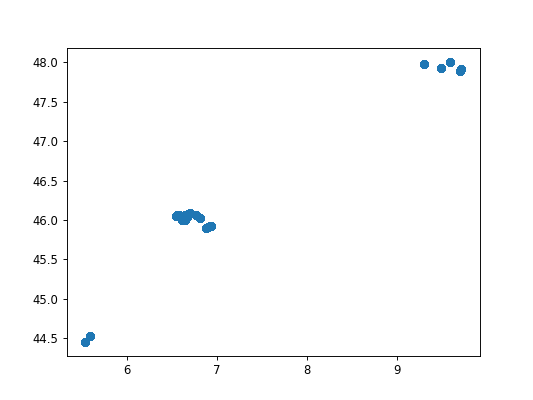

In [13]:
plt.figure()
plt.scatter(crop_yield_data.New_Longitude, crop_yield_data.New_Latitude)

## Basic model 

For our first model we will only use a handfull of features, specifically:
1. GDD: this indicator is related to the amount of sun
2. Rainfall: indicator for the amount of rain
3. TimeTo: time until harvesting
4. HeatShock, Frostshock: indicators of temperature shocks
5. High yield / Low yield: important feature as it determines the method of growth

In [14]:
feature_names = ['GDD', 'Rainfall', 'TimeTo', 'High yield', 'Low yield',
                'PC1', 'PC2', 'NDVImean', 'NDVIsum', 'NDWImean', 'NDWIsum', 'variety_idx',
                'Cabernet Sauvignon', 'Chardonnay', 'Marzemino', 'Merlot', 'Pinot Gris',
                'Pinot Noir', 'Rare Red', 'Riesling', 'Sauvignon Blanc', 'Sauvignon Gris',
                'Syrah']
df = crop_yield_data[feature_names]
df

,GDD,Rainfall,TimeTo,High yield,Low yield,PC1,PC2,NDVImean,NDVIsum,NDWImean,NDWIsum,variety_idx,Cabernet Sauvignon,Chardonnay,Marzemino,Merlot,Pinot Gris,Pinot Noir,Rare Red,Riesling,Sauvignon Blanc,Sauvignon Gris,Syrah
0,802.0,636.0,60,0,1,538.980888,12.244786,0.740918,700.908104,0.179463,169.771876,1,0,0,0,0,0,0,0,0,0,1,0
1,802.0,636.0,60,0,1,250.343140,14.076773,0.786083,517.242711,0.227985,150.013921,2,0,0,0,0,1,0,0,0,0,0,0
2,802.0,636.0,60,0,1,1293.231233,29.758541,0.717883,1178.046488,0.158046,259.354077,2,0,0,0,0,1,0,0,0,0,0,0
3,802.0,636.0,60,0,1,103.733773,8.197270,0.732823,416.976093,0.182909,104.075383,3,0,0,0,0,0,1,0,0,0,0,0
4,802.0,636.0,60,0,1,131.609356,7.079762,0.782788,439.926718,0.234459,131.765965,3,0,0,0,0,0,1,0,0,0,0,0
5,802.0,636.0,60,0,1,633.751390,12.048381,0.822291,790.221870,0.244260,234.733404,3,0,0,0,0,0,1,0,0,0,0,0
6,802.0,636.0,60,0,1,-153.407796,1.949704,0.839368,256.007092,0.295617,90.163050,4,0,0,0,0,0,0,0,1,0,0,0
7,802.0,636.0,60,1,0,-440.802103,2.388179,0.626314,51.357752,0.098867,8.107091,5,0,0,0,0,0,0,0,0,1,0,0
8,802.0,636.0,60,1,0,-330.867991,3.597699,0.750758,126.127409,0.202475,34.015848,5,0,0,0,0,0,0,0,0,1,0,0
9,802.0,636.0,60,1,0,490.245671,16.976339,0.778809,670.554494,0.236380,203.522766,5,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df.to_numpy()

array([[802. , 636. ,  60. , ...,   0. ,   1. ,   0. ],
       [802. , 636. ,  60. , ...,   0. ,   0. ,   0. ],
       [802. , 636. ,  60. , ...,   0. ,   0. ,   0. ],
       ...,
       [329.5, 266.9, 103. , ...,   0. ,   0. ,   0. ],
       [329.5, 266.9, 103. , ...,   0. ,   0. ,   0. ],
       [329.5, 266.9, 103. , ...,   0. ,   0. ,   0. ]])

In [30]:
from typing import List
from datetime import datetime
from torch.nn import Sequential, Linear, ReLU, BatchNorm1d
from tukey.losses import TuckeyGandHloss

def convert_dataset_to_tensor(pd_data: pd.DataFrame, feature_names: List[str], target_name: str,
                             log_target: bool = True, mean_features: float = None,
                              std_features: float = None):
    features = pd_data[feature_names]
    targets = pd_data[target_name]
    features_torch = torch.from_numpy(features.to_numpy()).to(dtype=torch.float32)
    targets_torch = torch.from_numpy(targets.to_numpy()).to(dtype=torch.float32)
    # apply transformations
    if log_target:
        targets_torch = torch.log(targets_torch * 200)
    else:
        targets_torch = targets_torch * 5
    # compute mean and std for training data
    if mean_features is None:
        mean = torch.mean(features_torch, dim=0, keepdims=True)
        std = torch.std(features_torch, dim=0, keepdims=True)
        features_torch = (features_torch - mean) / std
        return (features_torch, targets_torch), (mean, std)
    # for new data apply mean and std from train data
    features_torch = (features_torch - mean_features) / std_features
    return features_torch, targets_torch

def split_train_test(pd_data: pd.DataFrame, split_date: str):
    split_date = datetime.fromisoformat(split_date)
    train, test = pd_data[pd_data.Date <= split_date], pd_data[pd_data.Date > split_date]
    return train, test

class NN(Sequential):
    def __init__(self, structure: list, n_out: int):
        subblocks = []
        self.n_out = n_out
        for i in range(len(structure) - 1):
            subblocks.extend(self._make_sublock(structure[i], structure[i + 1]))
        subblocks.extend(self._make_final_layer(structure[-1]))
        super().__init__(*subblocks)

    def _make_sublock(self, n_in: int, n_out: int):
        return [Linear(n_in, n_out), ReLU(), ]

    def _make_final_layer(self, n_in : int):
        return [Linear(n_in, self.n_out), ]

def train_for_one_epoch(nn, optimizer, train_dataset: Dataset, val_dataset: Dataset):
    nn.train()
    dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
    losses = []
    losses_gaussian = []
    for x, y in dataloader:
        optimizer.zero_grad()
        y_hat = nn(x)
        loss_y_yhat = loss(y_hat, y)
        loss_y_yhat.backward()
        optimizer.step()
        losses.append(loss_y_yhat.detach().item())
    print('Train losses: ', np.mean(losses))
    
    nn.eval()
    dataloader_val = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
    losses = []
    losses_gaussian = []
    with torch.no_grad():
        for x, y in dataloader_val:
            y_hat = nn(x)
            loss_y_yhat = loss(y_hat, y)
            losses.append(loss_y_yhat.detach().item())
    print('Validation losses: ', np.mean(losses))

In [33]:
train, test = split_train_test(crop_yield_data, '2021-12-17')
train_torch, mean_std = convert_dataset_to_tensor(train, feature_names, 'YieldPerHec', False)
test_torch = convert_dataset_to_tensor(test, feature_names, 'YieldPerHec', False, *mean_std)

In [34]:
mean_std

(tensor([[ 3.6337e+02,  6.4886e+02,  1.0856e+02,  4.9983e-01,  5.0017e-01,
          -1.2987e-06,  7.6094e-09,  6.5576e-01,  3.3449e+02,  1.5981e-01,
           8.4793e+01,  4.6154e+00,  2.4041e-02,  1.1212e-01,  1.0389e-03,
           3.8856e-03,  5.1531e-02,  2.2973e-01,  1.5002e-02,  1.6415e-02,
           4.9879e-01,  3.6259e-02,  1.0244e-02]]),
 tensor([[2.9884e+02, 2.6053e+02, 4.5193e+01, 5.0001e-01, 5.0001e-01, 3.9060e+02,
          1.0344e+01, 1.1838e-01, 2.5557e+02, 1.2189e-01, 9.9786e+01, 1.7067e+00,
          1.5318e-01, 3.1552e-01, 3.2216e-02, 6.2214e-02, 2.2108e-01, 4.2066e-01,
          1.2156e-01, 1.2707e-01, 5.0000e-01, 1.8694e-01, 1.0069e-01]]))

In [35]:
from torch.optim import Adam
nn = NN((len(feature_names), 256, 256, 512, 512), 4)  # 4 outputs required for G-and-H
optimizer = Adam(nn.parameters(), lr=1e-9)

Train losses:  0.44831880927085876
Validation losses:  nan


/home/user/.cache/pypoetry/virtualenvs/tukey-ARYsNs6v-py3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/.cache/pypoetry/virtualenvs/tukey-ARYsNs6v-py3.8/lib/python3.8/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


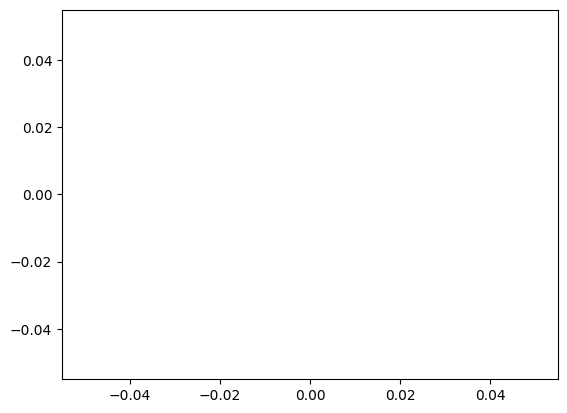

KeyboardInterrupt: 

In [36]:
%matplotlib inline

N_EPOCHS = 50
BATCH_SIZE = 1024
loss = TuckeyGandHloss(n_target_channels=1)

for i_epoch in range(N_EPOCHS):
    epoch_loss = train_for_one_epoch(nn, optimizer, TensorDataset(*train_torch), TensorDataset(*test_torch))
    nn.eval()
    with torch.no_grad():
        pred_ci = loss.predict_ci(nn(test_torch[0]))
    plt.figure()
    plt.scatter(test_torch[1], pred_ci[0])
    plt.show()
    plt.pause(0.1)


Now we look at some predictions on the validation dataset

In [315]:
with torch.no_grad():
    pred = loss.predict(nn(train_torch[0]))
    pred = torch.cat(pred, dim=1)
    ci = loss.predict_ci(nn(train_torch[0]))

In [316]:
pred

tensor([[ 0.8656,  2.1413, -0.3636,  0.0338],
        [ 0.8656,  2.1413, -0.3636,  0.0338],
        [ 0.8656,  2.1413, -0.3636,  0.0338],
        ...,
        [ 0.8655,  2.1411, -0.3636,  0.0338],
        [ 0.8655,  2.1411, -0.3636,  0.0338],
        [ 0.8655,  2.1411, -0.3636,  0.0338]])

In [317]:
ci

(tensor([[-0.5591],
         [-0.5591],
         [-0.5591],
         ...,
         [-0.5591],
         [-0.5592],
         [-0.5592]]),
 tensor([[1.5641],
         [1.5641],
         [1.5641],
         ...,
         [1.5641],
         [1.5641],
         [1.5641]]))

<IPython.core.display.Javascript object>


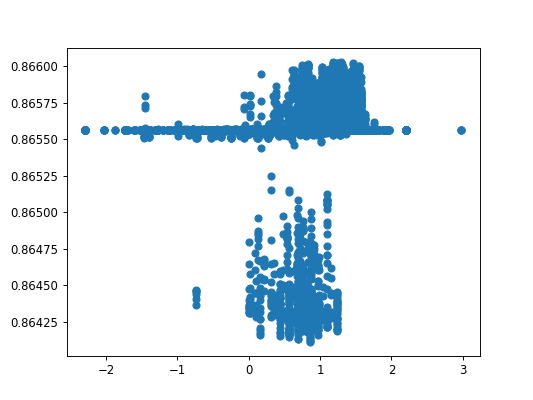

In [318]:
plt.figure()
plt.scatter(train_torch[1], pred[:, 0])

<IPython.core.display.Javascript object>


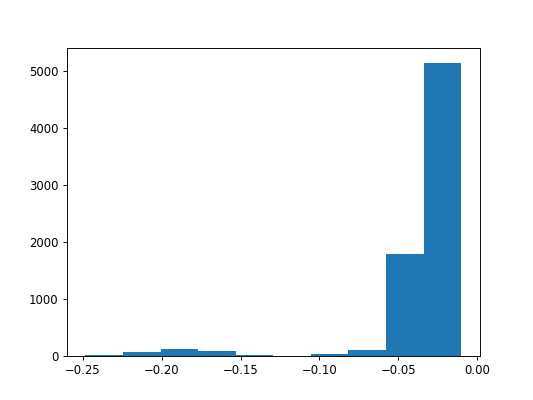

(array([  12.,   73.,  115.,   92.,   12.,    7.,   31.,   99., 1795.,
        5150.]),
 array([-0.2484259 , -0.22457965, -0.20073341, -0.17688715, -0.1530409 ,
        -0.12919466, -0.10534841, -0.08150216, -0.05765591, -0.03380966,
        -0.00996341]),
 <BarContainer object of 10 artists>)

In [232]:
plt.figure()
plt.hist(pred[:, 0])

In [330]:
train_torch[0][:10], train_torch[1][:10]

(tensor([[ 1.3736,  0.0179, -1.0955, -0.3304, -0.0544, -0.9985,  0.9985,  1.3777,
           1.1809,  0.6807,  1.4240,  0.1327,  0.8175, -2.1212, -0.1552, -0.3538,
          -0.0313, -0.0618, -0.2321, -0.5512, -0.1228, -0.1289, -0.9965,  5.1414,
          -0.0979],
         [ 1.3736,  0.0179, -1.0955, -0.3304, -0.0544, -0.9985,  0.9985,  0.6387,
           1.3535,  1.0526,  0.7075,  0.5189,  0.6243, -1.5322, -0.1552, -0.3538,
          -0.0313, -0.0618,  4.3090, -0.5512, -0.1228, -0.1289, -0.9965, -0.1945,
          -0.0979],
         [ 1.3736,  0.0179, -1.0955, -0.3304, -0.0544, -0.9985,  0.9985,  3.3089,
           2.8304,  0.4911,  3.2853, -0.0377,  1.6934, -1.5322, -0.1552, -0.3538,
          -0.0313, -0.0618,  4.3090, -0.5512, -0.1228, -0.1289, -0.9965, -0.1945,
          -0.0979],
         [ 1.3736,  0.0179, -1.0955, -0.3304, -0.0544, -0.9985,  0.9985,  0.2633,
           0.7997,  0.6141,  0.3164,  0.1602,  0.1751, -0.9432, -0.1552, -0.3538,
          -0.0313, -0.0618, -0.2321,  

In [270]:
test_torch[0][:10], test_torch[1][:10]

(tensor([[ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985,  1.1836,
           0.2690],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985,  0.3500,
           0.4355],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985,  2.7930,
           0.5514],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985,  0.0356,
           0.6487],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985,  0.1489,
           0.4112],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985,  1.2848,
           1.3930],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544, -0.9985,  0.9985, -0.6165,
          -0.0137],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544,  1.0015, -1.0015, -1.1569,
           0.1809],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544,  1.0015, -1.0015, -0.9032,
           0.1067],
         [ 0.5540, -0.5719, -0.5465, -0.3304, -0.0544,  1.0015, -1.0015,  0.9745,


In [331]:
test[:100][feature_names]

,GDD,Rainfall,TimeTo,HeatShock,FrostShock,High yield,Low yield,PC1,PC2,NDVImean,NDVIsum,NDWImean,NDWIsum,variety_idx,Cabernet Sauvignon,Chardonnay,Marzemino,Merlot,Pinot Gris,Pinot Noir,Rare Red,Riesling,Sauvignon Blanc,Sauvignon Gris,Syrah
2572,543.0,479.9,86,-1,-1,0,1,463.171771,2.562182,0.668416,632.321680,0.196378,185.773372,1,0,0,0,0,0,0,0,0,0,1,0
2573,543.0,479.9,86,-1,-1,0,1,137.592337,4.330721,0.634811,417.705884,0.124080,81.644816,2,0,0,0,0,1,0,0,0,0,0,0
2574,543.0,479.9,86,-1,-1,0,1,1091.736936,5.561274,0.616459,1011.609492,0.120979,198.526000,2,0,0,0,0,1,0,0,0,0,0,0
2575,543.0,479.9,86,-1,-1,0,1,14.808278,6.594232,0.575187,327.281556,0.075615,43.024753,3,0,0,0,0,0,1,0,0,0,0,0
2576,543.0,479.9,86,-1,-1,0,1,59.042548,4.072063,0.663638,372.964394,0.144437,81.173875,3,0,0,0,0,0,1,0,0,0,0,0
2577,543.0,479.9,86,-1,-1,0,1,502.695200,14.496184,0.680255,653.724793,0.141193,135.686858,3,0,0,0,0,0,1,0,0,0,0,0
2578,543.0,479.9,86,-1,-1,0,1,-239.904235,-0.438788,0.571995,174.458511,0.091896,28.028362,4,0,0,0,0,0,0,0,1,0,0,0
2579,543.0,479.9,86,-1,-1,1,0,-450.969475,1.627108,0.519039,42.561217,0.085423,7.004722,5,0,0,0,0,0,0,0,0,1,0,0
2580,543.0,479.9,86,-1,-1,1,0,-351.891153,0.839487,0.648289,108.912496,0.174216,29.268299,5,0,0,0,0,0,0,0,0,1,0,0
2581,543.0,479.9,86,-1,-1,1,0,381.490458,1.274428,0.677877,583.651876,0.216539,186.439736,5,0,0,0,0,0,0,0,0,1,0,0


In [239]:
test[:100].YieldPerHec

2572    0.055096
2573    0.021897
2574    0.063169
2575    0.028884
2576    0.015896
2577    0.022006
2578    0.019142
2579    0.073800
2580    0.081863
2581    0.084608
          ...   
2688    0.045655
2689    0.052825
2690    0.099657
2691    0.072474
2692    0.078353
2693    0.214058
2694    0.076032
2695    0.043580
2696    0.102289
2697    0.094467
Name: YieldPerHec, Length: 100, dtype: float64